<h1> Landscape profiles evolution 

In [155]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
location1=r'peclet/r3s1_slc02.8.csv'

In [21]:
fulldata1 = pd.read_csv(location1)
top = fulldata1.head(3)
top

,Flow discharge,Elevation change,Catchment ID,Points:0,Points:1,Points:2
0,292570,-0.128040,2422.1,21396,11398,409.85
1,100680,-0.089277,2423.0,21396,11125,409.90
2,6208500,-0.061447,2421.3,21396,12176,409.93


In [22]:
data1 = fulldata1[["Points:1","Points:2"]]
top = data1.head(3)
top

,Points:1,Points:2
0,11398,409.85
1,11125,409.90
2,12176,409.93


In [23]:
df1 = data1.sort(['Points:1'], ascending=True)
top = df1.head(3)
top

,Points:1,Points:2
197,0.00,10.000
196,261.78,92.987
207,400.00,135.290


In [24]:
x1 = np.array(df1[df1.columns[0::2]])
xmin = x1.min(axis=0)
xmax = x1.max(axis=0)
y1 = np.array(df1[df1.columns[1::2]])
ymin = y1.min(axis=0)
ymax = y1.max(axis=0)
print xmin,xmax,ymin,ymax

[ 0.] [ 40000.] [ 10.] [ 410.]


(0, 800)

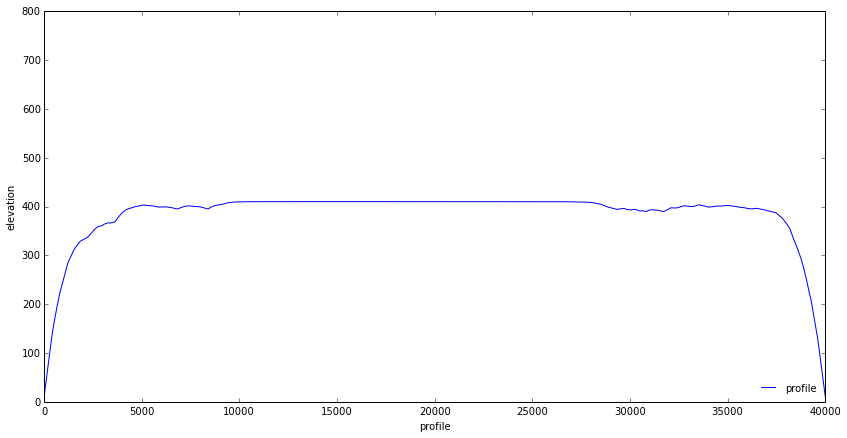

In [26]:
figure = plt.figure()
figure.set_dpi(500)
figure.set_size_inches(14, 7)
plt.plot(x1, y1, label='profile')
legend = plt.legend(loc='lower right', shadow=False,prop={'size':10})
legend.draw_frame(False)
plt.xlabel('profile')
plt.ylabel('elevation')
axes = plt.gca()
axes.set_xlim([xmin,xmax])
axes.set_ylim([ymin,ymax])
axes.set_xlim([0,40000])
axes.set_ylim([0,800])
#figure.savefig('profile.png')

In [27]:
import glob
path=r'peclet/r3s1_slc02'
allFiles = glob.glob(path+"*.csv")
dfs = []
for file in allFiles:
    df = pd.io.parsers.read_csv(file) 
    dfs.append(df)
df1 = pd.concat(dfs, ignore_index=True)
data = df1[["Points:1","Points:2"]]
dsort = data.sort(['Points:1'], ascending=True)
top = df1.head(3)
top
#x = np.array(dsort[dsort.columns[0::2]])
#y = np.array(dsort[dsort.columns[1::2]])
#print i

,Flow discharge,Elevation change,Catchment ID,Points:0,Points:1,Points:2
0,196350,-49.971,2303,21396,11398,1485.1
1,100710,-49.973,2365,21396,11125,1423.5
2,412990,-49.962,2309,21396,12176,1539.8


(0, 500)

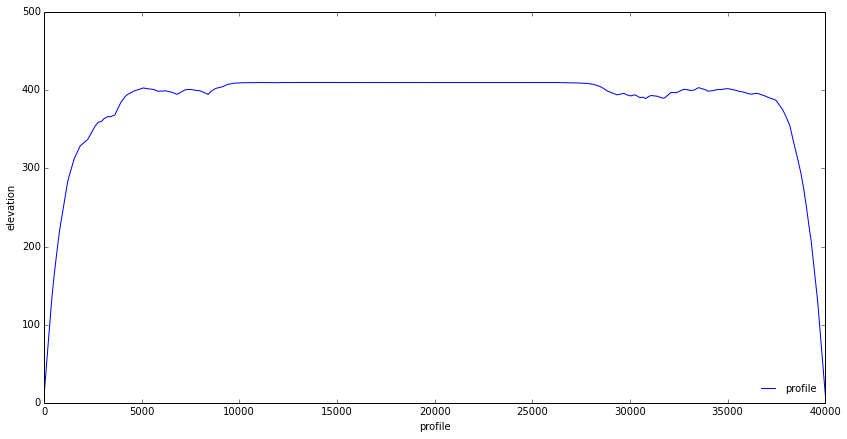

In [29]:
figure = plt.figure()
figure.set_dpi(500)
figure.set_size_inches(14, 7)
plt.plot(x1, y1, label='profile')
legend = plt.legend(loc='lower right', shadow=False,prop={'size':10})
legend.draw_frame(False)
plt.xlabel('profile')
plt.ylabel('elevation')
axes = plt.gca()
axes.set_xlim([0,40000])
axes.set_ylim([0,500])

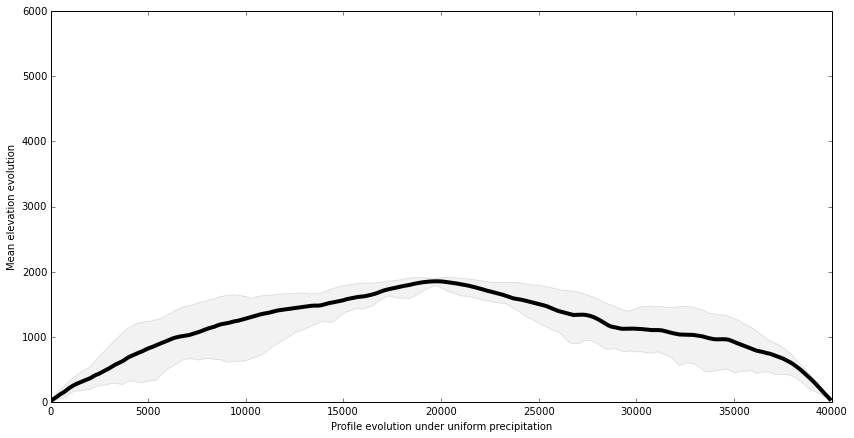

In [99]:
import pandas as pd
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

# Set figure axes and legend
figure = plt.figure()
figure.set_dpi(500)
figure.set_size_inches(14, 7)

plt.xlabel('Profile evolution under uniform precipitation')
plt.ylabel('Mean elevation evolution')
axes = plt.gca()
axes.set_xlim([0,40000])
axes.set_ylim([0,6000])

xreg = np.arange(0,40000,100)

totZ = xreg
timeStep = []
meanZ = []  
maxZ = xreg
minZ = xreg

for time in range(0, 300):

    path=r'peclet/r3s1_slc*'
    allFiles = glob.glob(path+"*.%d.csv"%time)
    nbfile=0
    totZ = 0.
    maxZ = 0.
    minZ = 10000.
    for file in allFiles:
        nbfile=nbfile+1
        fulldata1 = pd.read_csv(file)
        data1 = fulldata1[["Points:1","Points:2"]]
        df1 = data1.sort(['Points:1'], ascending=True)
        x1 = np.array(df1[df1.columns[0::2]])
        y1 = np.array(df1[df1.columns[1::2]])
        # reshape arrays
        x = np.asarray(x1).squeeze()
        y = np.asarray(y1).squeeze()
        # interpolate
        f = interpolate.interp1d(x,y)
        interpZ = f(xreg)
        totZ = totZ+interpZ
        maxZ = np.maximum(maxZ,interpZ)
        minZ = np.minimum(minZ,interpZ)
    
    totZ = totZ/nbfile
    if time == 39:
        #plt.plot(xreg, totZ, label='mean',color='k',linewidth=2)
        #plt.plot(xreg, maxZ, label='max',linestyle=':', color='g')
        #plt.plot(xreg, minZ, label='min',linestyle='--', color='r')
        #axes.fill_between(xreg, minZ, maxZ,facecolor='gray', interpolate=True,alpha=0.1)
        #plt.legend()
        #plt.savefig('phase1_200k.jpg', dpi=1200)
        plt.plot(xreg, totZ, label='mean',color='k',linewidth=4)
        plt.plot(xreg, maxZ, label='max',linestyle='_', color='g')
        plt.plot(xreg, minZ, label='min',linestyle='_', color='r')
        axes.fill_between(xreg, minZ, maxZ,facecolor='gray', interpolate=True,alpha=0.1)
        #plt.legend()
        plt.savefig('phase1_200k.jpg', dpi=1200)
        
    mean_elev=np.sum(totZ)/xreg.shape[0]
    meanZ.append(mean_elev)
    timeStep.append(time*50000)
    

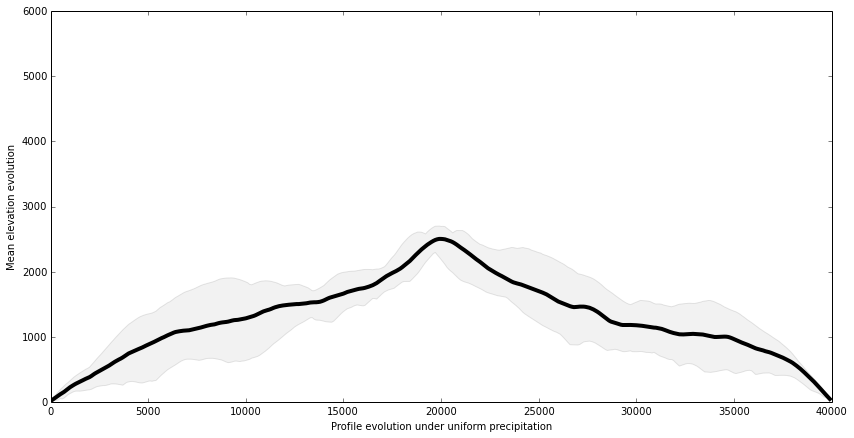

In [97]:
import pandas as pd
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

# Set figure axes and legend
figure = plt.figure()
figure.set_dpi(500)
figure.set_size_inches(14, 7)

plt.xlabel('Profile evolution under uniform precipitation')
plt.ylabel('Mean elevation evolution')
axes = plt.gca()
axes.set_xlim([0,40000])
axes.set_ylim([0,6000])

xreg = np.arange(0,40000,100)

totZ = xreg
timeStep = []
meanZ = []  
maxZ = xreg
minZ = xreg

for time in range(0, 300):

    path=r'peclet/r3s1_slc*'
    allFiles = glob.glob(path+"*.%d.csv"%time)
    nbfile=0
    totZ = 0.
    maxZ = 0.
    minZ = 10000.
    for file in allFiles:
        nbfile=nbfile+1
        fulldata1 = pd.read_csv(file)
        data1 = fulldata1[["Points:1","Points:2"]]
        df1 = data1.sort(['Points:1'], ascending=True)
        x1 = np.array(df1[df1.columns[0::2]])
        y1 = np.array(df1[df1.columns[1::2]])
        # reshape arrays
        x = np.asarray(x1).squeeze()
        y = np.asarray(y1).squeeze()
        # interpolate
        f = interpolate.interp1d(x,y)
        interpZ = f(xreg)
        totZ = totZ+interpZ
        maxZ = np.maximum(maxZ,interpZ)
        minZ = np.minimum(minZ,interpZ)
    
    totZ = totZ/nbfile
    if time == 299:
        plt.plot(xreg, totZ, label='mean',color='k',linewidth=4)
        plt.plot(xreg, maxZ, label='max',linestyle='_', color='g')
        plt.plot(xreg, minZ, label='min',linestyle='_', color='r')
        axes.fill_between(xreg, minZ, maxZ,facecolor='gray', interpolate=True,alpha=0.1)
        plt.savefig('phase1_1500k.jpg', dpi=1200)
        
    mean_elev=np.sum(totZ)/xreg.shape[0]
    meanZ.append(mean_elev)
    timeStep.append(time*50000)

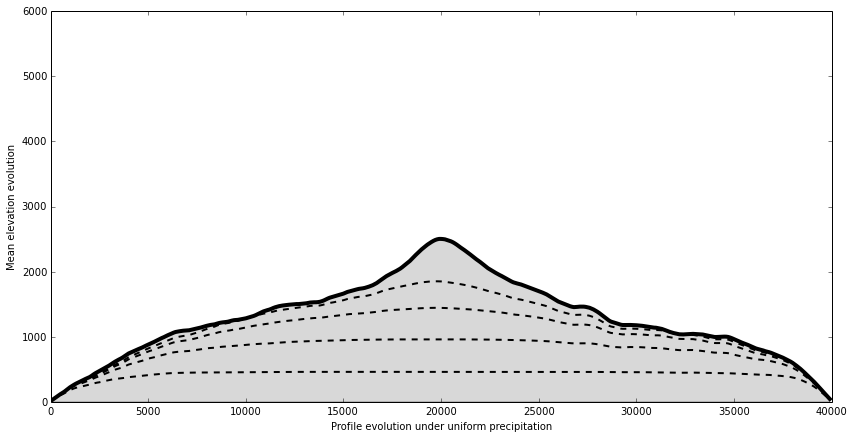

In [85]:
import pandas as pd
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

# Set figure axes and legend
figure = plt.figure()
figure.set_dpi(500)
figure.set_size_inches(14, 7)

plt.xlabel('Profile evolution under uniform precipitation')
plt.ylabel('Mean elevation evolution')
axes = plt.gca()
axes.set_xlim([0,40000])
axes.set_ylim([0,6000])

xreg = np.arange(0,40000,100)

totZ = xreg
timeStep = []
meanZ = []  
maxZ = xreg
minZ = xreg
mminZ = []  
mmaxZ = []  
uplift = []  
zee = xreg
tec=0
for time in range(0, 300):

    path=r'peclet/r3s1_slc*'
    allFiles = glob.glob(path+"*.%d.csv"%time)
    nbfile=0
    totZ = 0.
    maxZ = 0.
    zee = 0.
    minZ = 10000.
    for file in allFiles:
        nbfile=nbfile+1
        fulldata1 = pd.read_csv(file)
        data1 = fulldata1[["Points:1","Points:2"]]
        df1 = data1.sort(['Points:1'], ascending=True)
        x1 = np.array(df1[df1.columns[0::2]])
        y1 = np.array(df1[df1.columns[1::2]])
        # reshape arrays
        x = np.asarray(x1).squeeze()
        y = np.asarray(y1).squeeze()
        # interpolate
        f = interpolate.interp1d(x,y)
        interpZ = f(xreg)
        totZ = totZ+interpZ
        maxZ = np.maximum(maxZ,interpZ)
        minZ = np.minimum(minZ,interpZ)
    
    totZ = totZ/nbfile
    if time == 299:
        plt.plot(xreg, totZ, label='mean',color='k',linewidth=4)
        axes.fill_between(xreg,zee, totZ,facecolor='gray', interpolate=True,alpha=0.3)
        plt.savefig('phase1_mean.jpg', dpi=1200)
        
    elif time==19:
        plt.plot(xreg, totZ, label='mean',color='k',linestyle='--',linewidth=2)

    elif time==39:
        plt.plot(xreg, totZ, label='mean',color='k',linestyle='--',linewidth=2)

    elif time==9:
        plt.plot(xreg, totZ, label='mean',color='k',linestyle='--',linewidth=2)
    
    elif time==29:
        plt.plot(xreg, totZ, label='mean',color='k',linestyle='--',linewidth=2)

    mean_elev=np.sum(totZ)/xreg.shape[0]
    max_elev=np.max(maxZ)
    min_elev=np.min(minZ)
    meanZ.append(mean_elev)
    mminZ.append(min_elev)
    mmaxZ.append(max_elev)
    tec=time*0.001*50000
    uplift.append(tec)
    

    timeStep.append(time*50000)

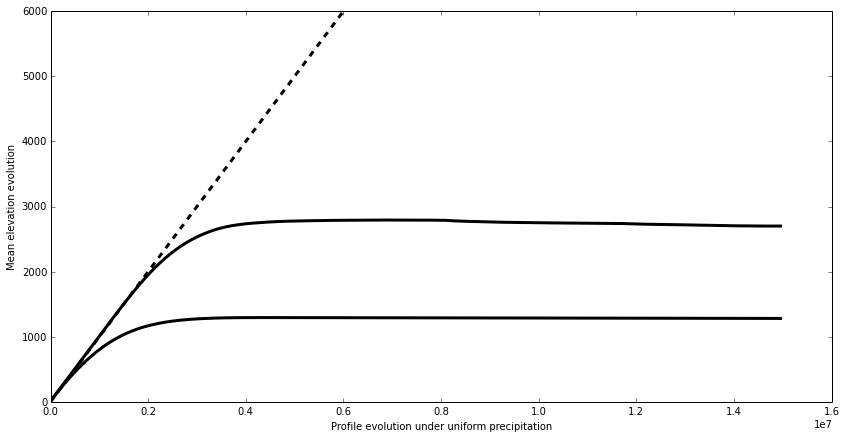

In [86]:
# Set figure axes and legend
figure = plt.figure()
figure.set_dpi(500)
figure.set_size_inches(14, 7)

plt.xlabel('Profile evolution under uniform precipitation')
plt.ylabel('Mean elevation evolution')
axes = plt.gca()
axes.set_ylim([0,6000])


plt.plot(timeStep, meanZ, label='mean',color='k',linewidth=3)
plt.plot(timeStep, mmaxZ, label='MDD', color='k',linewidth=3)
plt.plot(timeStep, uplift, label='uplift',linestyle='--', color='k',linewidth=3)
#axes.fill_between(timeStep, mminZ, mmaxZ,facecolor='gray', interpolate=True,alpha=0.1)
#plt.savefig('phase1_1500k.jpg', dpi=1200)
        
#plt.plot(timeStep, meanZ, label='profile')

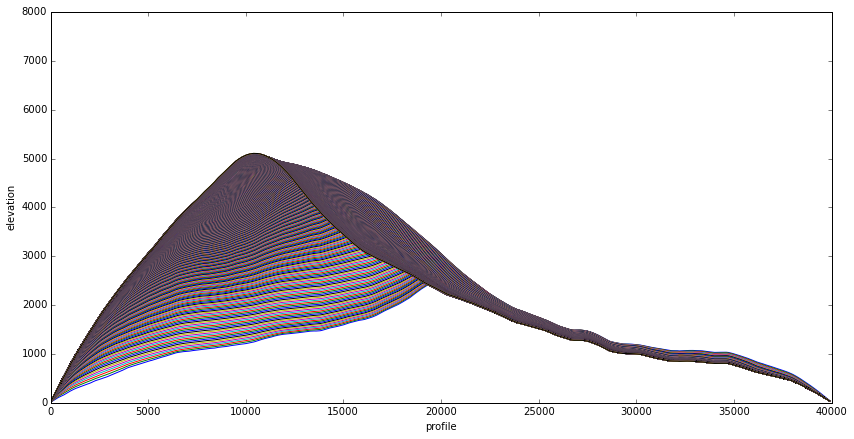

In [93]:
# Set figure axes and legend
figure = plt.figure()
figure.set_dpi(500)
figure.set_size_inches(14, 7)

plt.xlabel('Profile evolution under precipitation gradient')
plt.ylabel('Mean elevation evolution')
axes = plt.gca()
axes.set_xlim([0,40000])
axes.set_ylim([0,8000])

xreg = np.arange(0,40000,100)

totZ2 = xreg
timeStep2 = []
meanZ2 = []  

for time in range(0, 700):

    path=r'peclet/r3s2_slc*'
    allFiles = glob.glob(path+"*.%d.csv"%time)
    nbfile=0
    totZ2 = 0.
    for file in allFiles:
        nbfile=nbfile+1
        fulldata1 = pd.read_csv(file)
        data1 = fulldata1[["Points:1","Points:2"]]
        df1 = data1.sort(['Points:1'], ascending=True)
        x1 = np.array(df1[df1.columns[0::2]])
        y1 = np.array(df1[df1.columns[1::2]])
        # reshape arrays
        x = np.asarray(x1).squeeze()
        y = np.asarray(y1).squeeze()
        # interpolate
        f = interpolate.interp1d(x,y)
        interpZ2 = f(xreg)
        totZ2 = totZ2+interpZ2
    
    totZ2 = totZ2/nbfile
    plt.plot(xreg, totZ2, label='profile')
    mean_elev=np.sum(totZ2)/xreg.shape[0]
    meanZ2.append(mean_elev)
    timeStep2.append(time*50000+15000000)

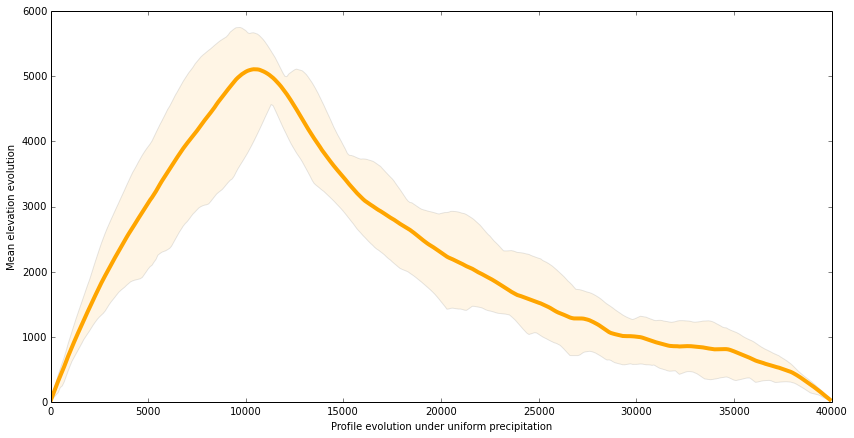

In [95]:
import pandas as pd
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

# Set figure axes and legend
figure = plt.figure()
figure.set_dpi(500)
figure.set_size_inches(14, 7)

plt.xlabel('Profile evolution under uniform precipitation')
plt.ylabel('Mean elevation evolution')
axes = plt.gca()
axes.set_xlim([0,40000])
axes.set_ylim([0,6000])

xreg = np.arange(0,40000,100)

totZ = xreg
timeStep = []
meanZ = []  
maxZ = xreg
minZ = xreg

for time in range(0, 700):

    path=r'peclet/r3s2_slc*'
    allFiles = glob.glob(path+"*.%d.csv"%time)
    nbfile=0
    totZ = 0.
    maxZ = 0.
    minZ = 10000.
    for file in allFiles:
        nbfile=nbfile+1
        fulldata1 = pd.read_csv(file)
        data1 = fulldata1[["Points:1","Points:2"]]
        df1 = data1.sort(['Points:1'], ascending=True)
        x1 = np.array(df1[df1.columns[0::2]])
        y1 = np.array(df1[df1.columns[1::2]])
        # reshape arrays
        x = np.asarray(x1).squeeze()
        y = np.asarray(y1).squeeze()
        # interpolate
        f = interpolate.interp1d(x,y)
        interpZ = f(xreg)
        totZ = totZ+interpZ
        maxZ = np.maximum(maxZ,interpZ)
        minZ = np.minimum(minZ,interpZ)
    
    totZ = totZ/nbfile
    if time == 699:
        plt.plot(xreg, totZ, label='mean',color='orange',linewidth=4)
        plt.plot(xreg, maxZ, label='max',linestyle='_', color='g')
        plt.plot(xreg, minZ, label='min',linestyle='_', color='r')
        axes.fill_between(xreg, minZ, maxZ,facecolor='orange', interpolate=True,alpha=0.1)
        plt.savefig('phase2_5000k.jpg', dpi=1200)
        
    mean_elev=np.sum(totZ)/xreg.shape[0]
    meanZ.append(mean_elev)
    timeStep.append(time*50000)

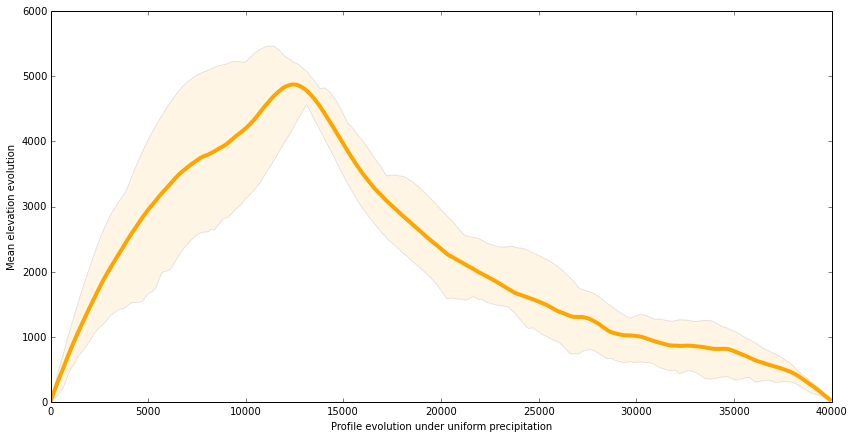

In [94]:
import pandas as pd
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

# Set figure axes and legend
figure = plt.figure()
figure.set_dpi(500)
figure.set_size_inches(14, 7)

plt.xlabel('Profile evolution under uniform precipitation')
plt.ylabel('Mean elevation evolution')
axes = plt.gca()
axes.set_xlim([0,40000])
axes.set_ylim([0,6000])

xreg = np.arange(0,40000,100)

totZ = xreg
timeStep = []
meanZ = []  
maxZ = xreg
minZ = xreg

for time in range(0, 700):

    path=r'peclet/r3s2_slc*'
    allFiles = glob.glob(path+"*.%d.csv"%time)
    nbfile=0
    totZ = 0.
    maxZ = 0.
    minZ = 10000.
    for file in allFiles:
        nbfile=nbfile+1
        fulldata1 = pd.read_csv(file)
        data1 = fulldata1[["Points:1","Points:2"]]
        df1 = data1.sort(['Points:1'], ascending=True)
        x1 = np.array(df1[df1.columns[0::2]])
        y1 = np.array(df1[df1.columns[1::2]])
        # reshape arrays
        x = np.asarray(x1).squeeze()
        y = np.asarray(y1).squeeze()
        # interpolate
        f = interpolate.interp1d(x,y)
        interpZ = f(xreg)
        totZ = totZ+interpZ
        maxZ = np.maximum(maxZ,interpZ)
        minZ = np.minimum(minZ,interpZ)
    
    totZ = totZ/nbfile
    if time == 299:
        plt.plot(xreg, totZ, label='mean',color='orange',linewidth=4)
        plt.plot(xreg, maxZ, label='max',linestyle='_', color='g')
        plt.plot(xreg, minZ, label='min',linestyle='_', color='r')
        axes.fill_between(xreg, minZ, maxZ,facecolor='orange', interpolate=True,alpha=0.1)
        plt.savefig('phase2_3000k.jpg', dpi=1200)
        
    mean_elev=np.sum(totZ)/xreg.shape[0]
    meanZ.append(mean_elev)
    timeStep.append(time*50000)

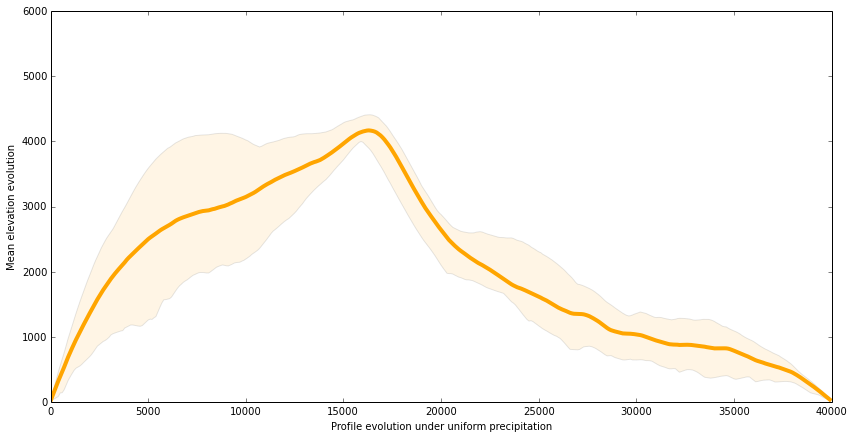

In [93]:
import pandas as pd
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

# Set figure axes and legend
figure = plt.figure()
figure.set_dpi(500)
figure.set_size_inches(14, 7)

plt.xlabel('Profile evolution under uniform precipitation')
plt.ylabel('Mean elevation evolution')
axes = plt.gca()
axes.set_xlim([0,40000])
axes.set_ylim([0,6000])

xreg = np.arange(0,40000,100)

totZ = xreg
timeStep = []
meanZ = []  
maxZ = xreg
minZ = xreg

for time in range(0, 700):

    path=r'peclet/r3s2_slc*'
    allFiles = glob.glob(path+"*.%d.csv"%time)
    nbfile=0
    totZ = 0.
    maxZ = 0.
    minZ = 10000.
    for file in allFiles:
        nbfile=nbfile+1
        fulldata1 = pd.read_csv(file)
        data1 = fulldata1[["Points:1","Points:2"]]
        df1 = data1.sort(['Points:1'], ascending=True)
        x1 = np.array(df1[df1.columns[0::2]])
        y1 = np.array(df1[df1.columns[1::2]])
        # reshape arrays
        x = np.asarray(x1).squeeze()
        y = np.asarray(y1).squeeze()
        # interpolate
        f = interpolate.interp1d(x,y)
        interpZ = f(xreg)
        totZ = totZ+interpZ
        maxZ = np.maximum(maxZ,interpZ)
        minZ = np.minimum(minZ,interpZ)
    
    totZ = totZ/nbfile
    if time == 99:
        plt.plot(xreg, totZ, label='mean',color='orange',linewidth=4)
        plt.plot(xreg, maxZ, label='max',linestyle='_', color='g')
        plt.plot(xreg, minZ, label='min',linestyle='_', color='r')
        axes.fill_between(xreg, minZ, maxZ,facecolor='orange', interpolate=True,alpha=0.1)
        plt.savefig('phase2_2000k.jpg', dpi=1200)
        
    mean_elev=np.sum(totZ)/xreg.shape[0]
    meanZ.append(mean_elev)
    timeStep.append(time*50000)

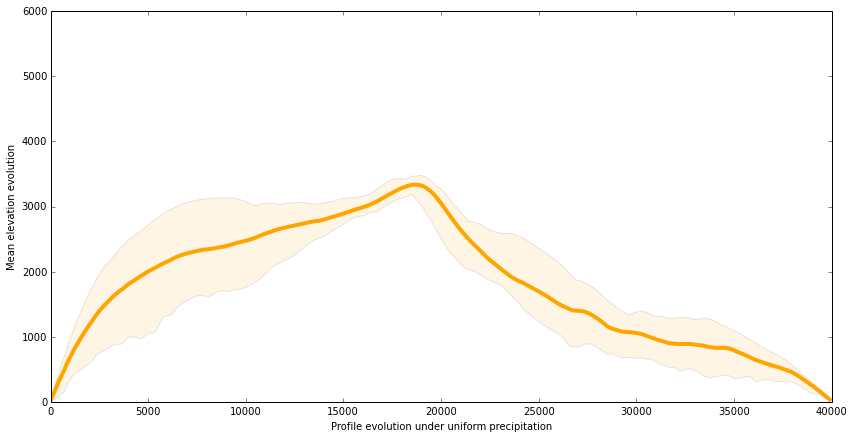

In [92]:
import pandas as pd
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

# Set figure axes and legend
figure = plt.figure()
figure.set_dpi(500)
figure.set_size_inches(14, 7)

plt.xlabel('Profile evolution under uniform precipitation')
plt.ylabel('Mean elevation evolution')
axes = plt.gca()
axes.set_xlim([0,40000])
axes.set_ylim([0,6000])

xreg = np.arange(0,40000,100)

totZ = xreg
timeStep = []
meanZ = []  
maxZ = xreg
minZ = xreg

for time in range(0, 700):

    path=r'peclet/r3s2_slc*'
    allFiles = glob.glob(path+"*.%d.csv"%time)
    nbfile=0
    totZ = 0.
    maxZ = 0.
    minZ = 10000.
    for file in allFiles:
        nbfile=nbfile+1
        fulldata1 = pd.read_csv(file)
        data1 = fulldata1[["Points:1","Points:2"]]
        df1 = data1.sort(['Points:1'], ascending=True)
        x1 = np.array(df1[df1.columns[0::2]])
        y1 = np.array(df1[df1.columns[1::2]])
        # reshape arrays
        x = np.asarray(x1).squeeze()
        y = np.asarray(y1).squeeze()
        # interpolate
        f = interpolate.interp1d(x,y)
        interpZ = f(xreg)
        totZ = totZ+interpZ
        maxZ = np.maximum(maxZ,interpZ)
        minZ = np.minimum(minZ,interpZ)
    
    totZ = totZ/nbfile
    if time == 49:
        plt.plot(xreg, totZ, label='mean',color='orange',linewidth=4)
        plt.plot(xreg, maxZ, label='max',linestyle='_', color='g')
        plt.plot(xreg, minZ, label='min',linestyle='_', color='r')
        axes.fill_between(xreg, minZ, maxZ,facecolor='orange', interpolate=True,alpha=0.1)
        plt.savefig('phase2_1750k.jpg', dpi=1200)
        
    mean_elev=np.sum(totZ)/xreg.shape[0]
    meanZ.append(mean_elev)
    timeStep.append(time*50000)

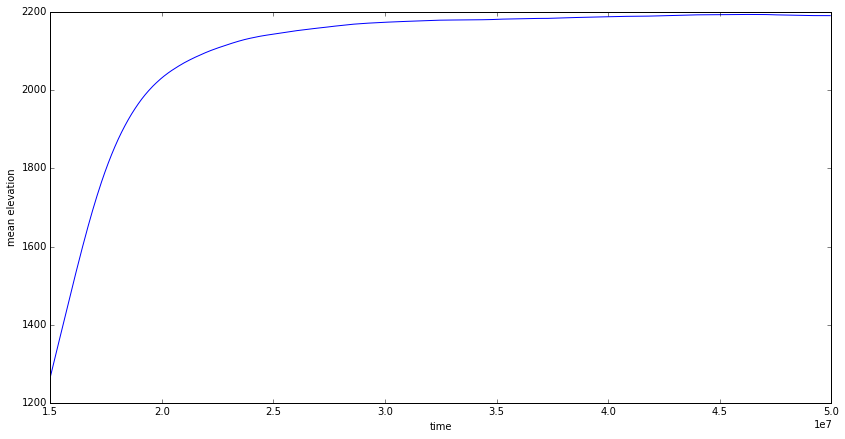

In [94]:
# Set figure axes and legend
figure = plt.figure()
figure.set_dpi(500)
figure.set_size_inches(14, 7)

plt.xlabel('time')
plt.ylabel('mean elevation')
axes = plt.gca()
plt.plot(timeStep2, meanZ2, label='profile')

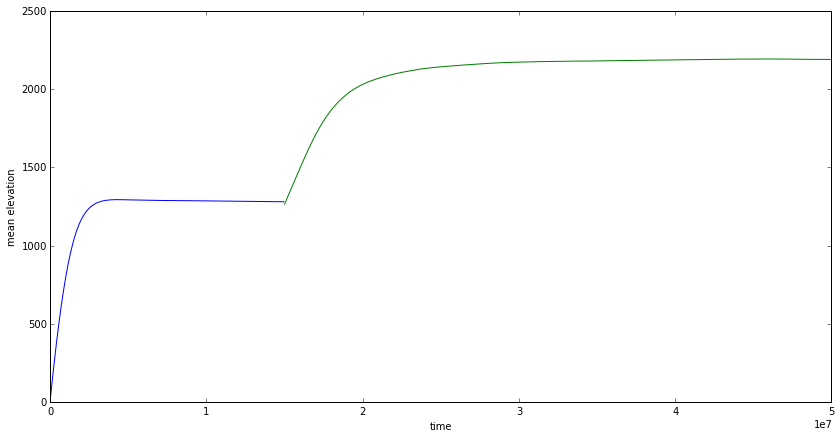

In [95]:
# Set figure axes and legend
figure = plt.figure()
figure.set_dpi(500)
figure.set_size_inches(14, 7)

plt.xlabel('time')
plt.ylabel('mean elevation')
axes = plt.gca()
plt.plot(timeStep, meanZ, label='profile')
plt.plot(timeStep2, meanZ2, label='profile')

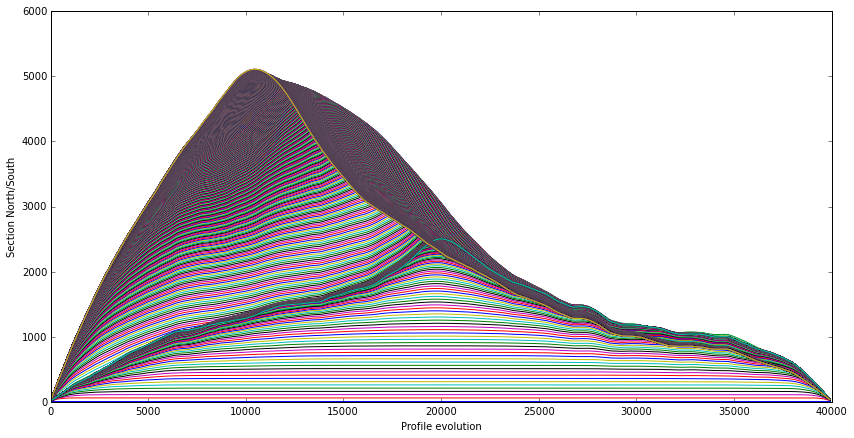

In [105]:
# Set figure axes and legend
figure = plt.figure()
figure.set_dpi(500)
figure.set_size_inches(14, 7)

plt.xlabel('Profile evolution')
plt.ylabel('Section North/South')
axes = plt.gca()
axes.set_xlim([0,40000])
axes.set_ylim([0,6000])

xreg = np.arange(0,40000,100)

totZ = xreg
timeStep = []
meanZ = []  

timeStep2 = []
meanZ2 = []

for time in range(0, 700):

    if time < 300:
        path1=r'peclet/r3s1_slc*'
        allFiles = glob.glob(path1+"*.%d.csv"%time)
        nbfile=0
        totZ = 0.
        for file in allFiles:
            nbfile=nbfile+1
            fulldata1 = pd.read_csv(file)
            data1 = fulldata1[["Points:1","Points:2"]]
            df1 = data1.sort(['Points:1'], ascending=True)
            x1 = np.array(df1[df1.columns[0::2]])
            y1 = np.array(df1[df1.columns[1::2]])
            # reshape arrays
            x = np.asarray(x1).squeeze()
            y = np.asarray(y1).squeeze()
            # interpolate
            f = interpolate.interp1d(x,y)
            interpZ = f(xreg)
            totZ = totZ+interpZ

        totZ = totZ/nbfile
        plt.plot(xreg, totZ, label='profile evolution under uniform precipitation')
        mean_elev=np.sum(totZ)/xreg.shape[0]
        meanZ.append(mean_elev)
        timeStep.append(time*50000)
    
    path2=r'peclet/r3s2_slc*'
    allFiles = glob.glob(path2+"*.%d.csv"%time)
    nbfile=0
    totZ2 = 0.
    for file in allFiles:
        nbfile=nbfile+1
        fulldata1 = pd.read_csv(file)
        data1 = fulldata1[["Points:1","Points:2"]]
        df1 = data1.sort(['Points:1'], ascending=True)
        x1 = np.array(df1[df1.columns[0::2]])
        y1 = np.array(df1[df1.columns[1::2]])
        # reshape arrays
        x = np.asarray(x1).squeeze()
        y = np.asarray(y1).squeeze()
        # interpolate
        f = interpolate.interp1d(x,y)
        interpZ2 = f(xreg)
        totZ2 = totZ2+interpZ2
    
    totZ2 = totZ2/nbfile
    plt.plot(xreg, totZ2, label='profile')
    mean_elev=np.sum(totZ2)/xreg.shape[0]
    meanZ2.append(mean_elev)
    timeStep2.append(time*50000+15000000)    

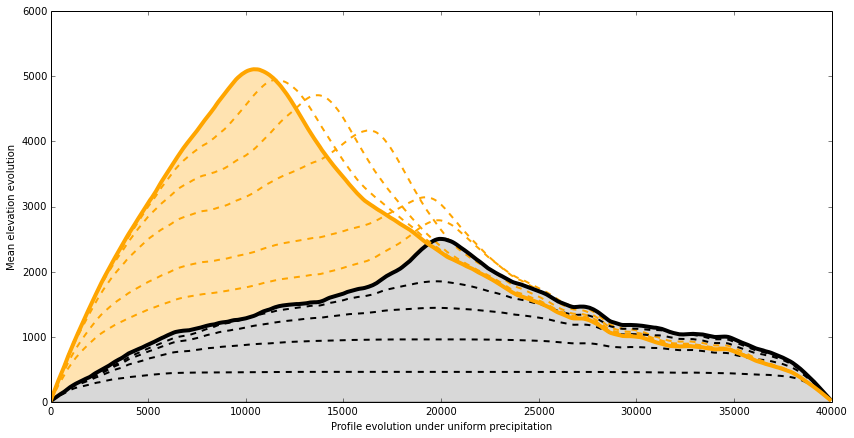

In [135]:
import pandas as pd
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

# Set figure axes and legend
figure = plt.figure()
figure.set_dpi(500)
figure.set_size_inches(14, 7)

plt.xlabel('Profile evolution under uniform precipitation')
plt.ylabel('Mean elevation evolution')
axes = plt.gca()
axes.set_xlim([0,40000])
axes.set_ylim([0,6000])

xreg = np.arange(0,40000,100)

totZ = xreg
timeStep = []
meanZ = []  
maxZ = xreg
maxZ2 = xreg
minZ = xreg
mminZ = []  
mmaxZ = []  
uplift = []  
mddpos = []  
mddpos1 = []
zee = xreg
tec=0

timeStep2 = []
meanZ2 = []
mmaxZ2 = [] 

for time in range(0, 700):

    if time < 300:
        path=r'peclet/r3s1_slc*'
        allFiles = glob.glob(path+"*.%d.csv"%time)
        nbfile=0
        totZ = 0.
        maxZ = 0.
        zee = 0.
        minZ = 10000.
        for file in allFiles:
            nbfile=nbfile+1
            fulldata1 = pd.read_csv(file)
            data1 = fulldata1[["Points:1","Points:2"]]
            df1 = data1.sort(['Points:1'], ascending=True)
            x1 = np.array(df1[df1.columns[0::2]])
            y1 = np.array(df1[df1.columns[1::2]])
            # reshape arrays
            x = np.asarray(x1).squeeze()
            y = np.asarray(y1).squeeze()
            # interpolate
            f = interpolate.interp1d(x,y)
            interpZ = f(xreg)
            totZ = totZ+interpZ
            maxZ = np.maximum(maxZ,interpZ)
            minZ = np.minimum(minZ,interpZ)

        totZ = totZ/nbfile
        if time == 299:
            plt.plot(xreg, totZ, label='mean',color='k',linewidth=4)
            axes.fill_between(xreg,zee, totZ,facecolor='gray', interpolate=True,alpha=0.3)
            #plt.savefig('phase1_mean.jpg', dpi=1200)

        elif time==19:
            plt.plot(xreg, totZ, label='mean',color='k',linestyle='--',linewidth=2)

        elif time==39:
            plt.plot(xreg, totZ, label='mean',color='k',linestyle='--',linewidth=2)

        elif time==9:
            plt.plot(xreg, totZ, label='mean',color='k',linestyle='--',linewidth=2)

        elif time==29:
            plt.plot(xreg, totZ, label='mean',color='k',linestyle='--',linewidth=2)

        mean_elev=np.sum(totZ)/xreg.shape[0]
        max_elev=np.max(maxZ)
        min_elev=np.min(minZ)
        meanZ.append(mean_elev)
        mminZ.append(min_elev)
        mmaxZ.append(max_elev)
        tec=time*0.001*50000
        uplift.append(tec)
        timeStep.append(time*50000)
        mddpos1.append(xreg[np.where(maxZ==maxZ.max())])

         
    path2=r'peclet/r3s2_slc*'
    allFiles = glob.glob(path2+"*.%d.csv"%time)
    nbfile=0
    totZ2 = 0.
    maxZ2 = 0.
    for file in allFiles:
        nbfile=nbfile+1
        fulldata1 = pd.read_csv(file)
        data1 = fulldata1[["Points:1","Points:2"]]
        df1 = data1.sort(['Points:1'], ascending=True)
        x1 = np.array(df1[df1.columns[0::2]])
        y1 = np.array(df1[df1.columns[1::2]])
        # reshape arrays
        x = np.asarray(x1).squeeze()
        y = np.asarray(y1).squeeze()
        # interpolate
        f = interpolate.interp1d(x,y)
        interpZ2 = f(xreg)
        totZ2 = totZ2+interpZ2
        maxZ2 = np.maximum(maxZ2,interpZ2)
    
    totZ2 = totZ2/nbfile
    if time == 699:
        plt.plot(xreg, totZ2, label='mean',color='orange',linewidth=4)
        axes.fill_between(xreg,totZ, totZ2,where=totZ2>=totZ,facecolor='orange', interpolate=True,alpha=0.3)
        plt.savefig('phase2_mean.jpg', dpi=1200)

    elif time==19:
        plt.plot(xreg, totZ2, label='mean',color='orange',linestyle='--',linewidth=2)

    elif time==39:
        plt.plot(xreg, totZ2, label='mean',color='orange',linestyle='--',linewidth=2)

    elif time==399:
        plt.plot(xreg, totZ2, label='mean',color='orange',linestyle='--',linewidth=2)

    elif time==99:
        plt.plot(xreg, totZ2, label='mean',color='orange',linestyle='--',linewidth=2)
        
    elif time==199:
        plt.plot(xreg, totZ2, label='mean',color='orange',linestyle='--',linewidth=2)
    #plt.plot(xreg, totZ2, label='profile')
    mean_elev=np.sum(totZ2)/xreg.shape[0]
    max_elev2=np.max(maxZ2)
    meanZ2.append(mean_elev)
    mmaxZ2.append(max_elev2)
    timeStep2.append(time*50000+15000000)    
    mddpos.append(xreg[np.where(maxZ2==maxZ2.max())])

In [131]:
mdd=[]
for time in range(0,700):
    x= np.max(mddpos[time])
    mdd.append(x)
print mdd

[20000, 20000, 20000, 20000, 20000, 20000, 20000, 20000, 20000, 20000, 20000, 20000, 20000, 20000, 20000, 20000, 20000, 20000, 20000, 19700, 19700, 19700, 19700, 19600, 19600, 19600, 19500, 19500, 19500, 19400, 19400, 19400, 19400, 19400, 19300, 19300, 19200, 19200, 19400, 19400, 19400, 19400, 19300, 18900, 18900, 18900, 19000, 19000, 19000, 19000, 18900, 18900, 18900, 18600, 18500, 18500, 18500, 18500, 18500, 18500, 18400, 18100, 18100, 18100, 18100, 18000, 18000, 17900, 17800, 17800, 17700, 17700, 17700, 17600, 17500, 17400, 17400, 17400, 17300, 17300, 17200, 17200, 17200, 17200, 17200, 16800, 16800, 16800, 16800, 16800, 16800, 16800, 16700, 16600, 16500, 16500, 16500, 16400, 16400, 16300, 16300, 16200, 16100, 16100, 16100, 16100, 16100, 16100, 16100, 16000, 16000, 16000, 15800, 15800, 15800, 15800, 15800, 15800, 15700, 15700, 15700, 15700, 15600, 15600, 15600, 15500, 15500, 15500, 15300, 15300, 15300, 15300, 15300, 15300, 15300, 15300, 15300, 14000, 14000, 13800, 13800, 13700, 13700

In [136]:
mdd1=[]
for time in range(0,300):
    x= np.max(mddpos1[time])
    mdd1.append(x)
print mdd1

[39900, 38400, 37400, 36300, 35000, 33800, 33100, 31600, 30800, 28000, 27000, 26000, 25400, 24100, 23300, 21900, 21500, 20900, 20900, 20200, 21500, 20900, 20500, 20500, 20300, 20300, 20300, 20400, 20400, 20400, 20400, 20400, 20400, 20400, 18900, 18900, 18900, 18900, 18900, 18900, 18900, 18900, 18900, 18900, 18900, 18900, 18900, 18900, 18900, 18900, 18900, 18900, 18900, 18900, 19000, 19000, 19000, 19000, 19000, 19000, 19000, 19000, 19000, 19000, 19000, 19000, 19000, 19000, 19000, 19000, 19000, 19000, 19000, 19000, 19000, 19000, 19000, 19000, 19000, 19000, 19000, 19000, 19000, 19000, 19000, 19000, 19300, 19300, 19300, 19300, 19300, 19300, 19300, 19300, 19300, 19300, 19300, 19300, 19300, 19300, 19300, 19300, 19300, 19300, 19300, 19300, 19300, 19300, 19300, 19300, 19300, 19300, 19300, 19300, 19300, 19300, 19300, 19300, 19300, 19300, 19300, 19300, 19300, 19300, 19300, 19300, 19300, 19400, 19400, 19400, 19400, 19400, 19400, 19400, 19400, 19400, 19400, 19400, 19400, 19400, 19400, 19400, 19400

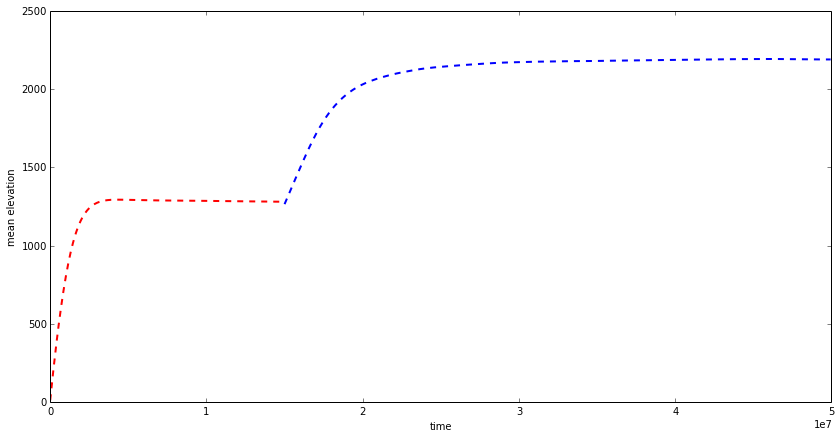

In [111]:
# Set figure axes and legend
figure = plt.figure()
figure.set_dpi(500)
figure.set_size_inches(14, 7)

plt.xlabel('time')
plt.ylabel('mean elevation')
axes = plt.gca()
plt.plot(timeStep, meanZ, color='r', linewidth=2.0, linestyle='--')
plt.plot(timeStep2, meanZ2, color='b', linewidth=2.0, linestyle='--')

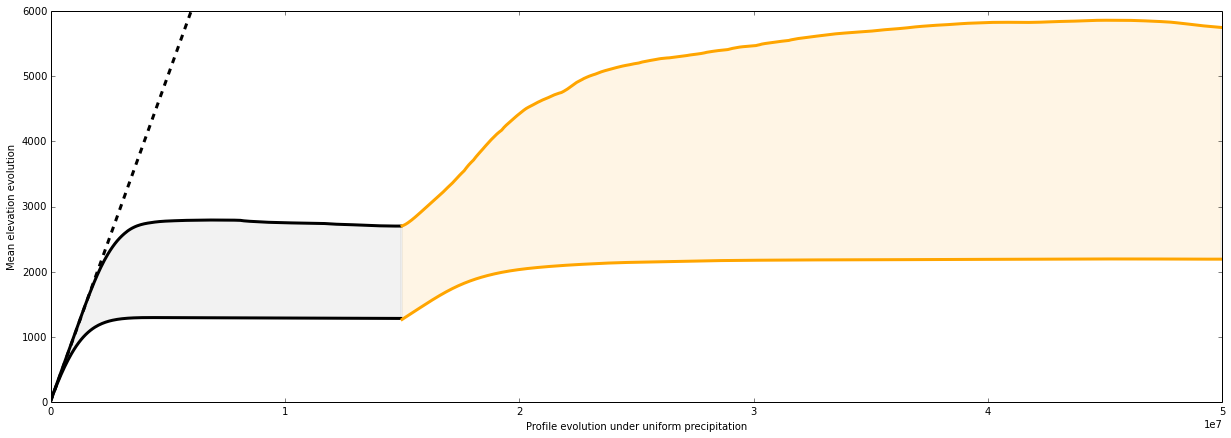

In [108]:
# Set figure axes and legend
figure = plt.figure()
figure.set_dpi(500)
figure.set_size_inches(21, 7)

plt.xlabel('Profile evolution under uniform precipitation')
plt.ylabel('Mean elevation evolution')
axes = plt.gca()
axes.set_ylim([0,6000])


plt.plot(timeStep, meanZ, label='mean',color='k',linewidth=3)
plt.plot(timeStep, mmaxZ, label='MDD', color='k',linewidth=3)
plt.plot(timeStep2, meanZ2, label='mean',color='orange',linewidth=3)
plt.plot(timeStep2, mmaxZ2, label='MDD', color='orange',linewidth=3)
plt.plot(timeStep, uplift, label='uplift',linestyle='--', color='k',linewidth=3)
axes.fill_between(timeStep, meanZ, mmaxZ,facecolor='gray', interpolate=True,alpha=0.1)
axes.fill_between(timeStep2, meanZ2, mmaxZ2,facecolor='orange', interpolate=True,alpha=0.1)
plt.savefig('elev_change.jpg', dpi=1200)
        
#plt.plot(timeStep, meanZ, label='profile')

In [140]:
mdd2=[]
for time in range(0,300):
    mdd2.append(20000)
    
    
mdd3=[]
for time in range(0,700):
    mdd3.append(20000)

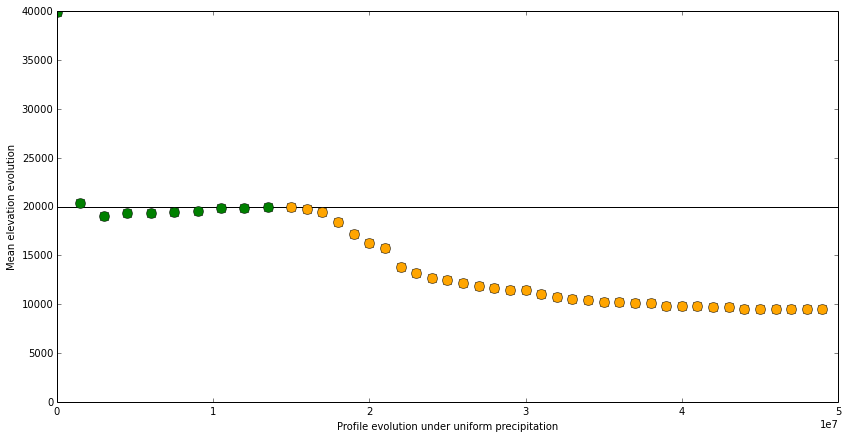

In [156]:
# Set figure axes and legend
figure = plt.figure()
figure.set_dpi(500)
figure.set_size_inches(14, 7)

plt.xlabel('Profile evolution under uniform precipitation')
plt.ylabel('Mean elevation evolution')
axes = plt.gca()
axes.set_ylim([0,40000])


plt.plot(timeStep, mdd2, label='mean',color='k',linewidth=1)
plt.plot(timeStep2, mdd3, label='MDD', color='k',linewidth=1)
#plt.plot(timeStep2, meanZ2, label='mean',color='orange',linewidth=3)
plt.plot(timeStep, mdd1, label='MDD', color='g',linewidth=0,marker="o",markevery=30,markersize=10)
plt.plot(timeStep2, mdd, label='MDD', color='orange',linewidth=0,marker="o",markevery=20,markersize=10)
#plt.plot(timeStep, uplift, label='uplift',linestyle='--', color='k',linewidth=3)
#axes.fill_between(timeStep, 40000, mdd2,facecolor='gray', interpolate=True,alpha=0.1)
#axes.fill_between(timeStep2, 40000, mdd3,facecolor='orange', interpolate=True,alpha=0.1)
plt.savefig('drainage.jpg', dpi=1200)